# Linear Convection

We are going to explore schemes for the linear convection (advection) equation

$$\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0, $$

where $a$ is the wave speed.  This equation governs to the motion of the wave that never loses its shape.  In, fact the weak solution to the linear convection equation is $u(x,t) = u(x-at,0)$.  This shows that the initial condition is propagated with a velocity equal to the wave speed.

Linear convection is a prototype hyperbolic equation with one characteristic line with a slope of $a$.

Let's start building the code to explore!

1. Get the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

2. Build the grid

We are using a uniform grid with 100 nodes within a domain $L = [-5,5]$.

In [4]:
#Wave Speed
c = 1.0

#Number of grid pts
M = 100

#size of x domain
L = 10.0
x = np.linspace(-L/2,L/2,M)
dx = L/M

3. Setup the initial condition

We are going to use a Gaussian wave:

$$ u_o = u(x,t=0) = \exp\left(-\frac{x^2}{\sigma^2}\right), $$

where $\sigma=1$ is the width of the profile

In [5]:
def initialize_data(u, x):
   sigma = 1
   u[:] = np.exp(-x**2/sigma**2)

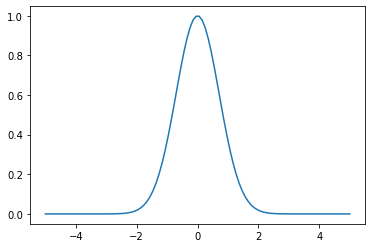

In [6]:
uo = np.zeros_like(x)
initialize_data(uo, x)
plt.plot(x,uo)

4. Calculate the error

Absolute error between the exact solution and the numerical solution is calculated as

$$ \epsilon_{abs} = \frac{1}{M} \sqrt{ \sum_{i=0}^M \left (u_e(x_i) - u(x_i) \right )^2 } $$

The relative error is

$$ \epsilon_{rel} = \epsilon_{abs}/ u_{mean}, $$

where $u_{mean} = \frac{1}{M} \sum_{i=0}^M u^2(x_i)$

In [7]:
def calculate_error(u, ue):

    eabs =  1.0/(u.shape[0])*np.sqrt( np.sum( (ue - u)**2 ) )
    umean = (1.0/(u.shape[0]+1.0) * np.sum(u**2) )**0.5

    erel = eabs/umean

    return eabs, erel


5. Initialize the data

We are selecting the CFL number $\nu = \frac{a\Delta t}{\Delta x}$.  It may change for different schemes

In [8]:
#set delta t
nu = 0.5
#size of time domain (1 periodic pass)
N = int (L / (nu*dx))

ue = np.zeros_like(x)

#Create the exact solution
initialize_data(ue, x)


## Forward in Time, Central in Space

$\mathrm{T.E.} = \mathcal{O}(\Delta t, \Delta x^2)$

$$u_i^{n+1} = u_i^n + \nu \left ( u^n_{i+1} - u^n_{i-1} \right )$$



0 0.5 1.0075264043369894
1 0.5 1.0178732826970536
2 0.5 1.0285023213287932
3 0.5 1.039422840391972
4 0.5 1.0506442434850476
5 0.5 1.0621759686968686
6 0.5 1.0740274304831159
7 0.5 1.086207951310286
8 0.5 1.0987266819588666
9 0.5 1.1115925093384886
10 0.5 1.1248139506452954
11 0.5 1.138399032690058
12 0.5 1.1523551552496527
13 0.5 1.16668893734983
14 0.5 1.1814060454794222
15 0.5 1.1965110028711328
16 0.5 1.2120069791677102
17 0.5 1.2278955600302641
18 0.5 1.244176496542921
19 0.5 1.2608474346292668
20 0.5 1.2779036251243654
21 0.5 1.2953376156432288
22 0.5 1.3131389259522899
23 0.5 1.3333349545999282
24 0.5 1.3548774518684419
25 0.5 1.3770506104523634
26 0.5 1.3998511553166213
27 0.5 1.4232714791629923
28 0.5 1.4472990996039363
29 0.5 1.4719160981056139
30 0.5 1.4970985473004956
31 0.5 1.5228159347748136
32 0.5 1.5490305924347607
33 0.5 1.5756971413729421
34 0.5 1.6027619661079977
35 0.5 1.6301627336450732
36 0.5 1.6604874553644944
37 0.5 1.6956235727580948
38 0.5 1.731561476217946
39 

(-5.0, 5.0)

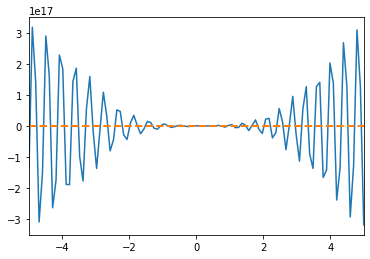

In [8]:
def central_scheme(nu, u, N):

    un = np.zeros_like(u)

    for i in range(N):
        un[0] = u[0] - nu*(u[1] - u[-1])
        for j in range(1,u.shape[0]-1):
            un[j] = u[j] - nu*(u[j+1] - u[j-1])
        un[-1] = u[-1] - nu*(u[0] - u[-2])

        u[:] = un[:]

        print(i, nu, np.max(u))
        
        
u = np.zeros_like(x)
initialize_data(u, x)
central_scheme(nu, u, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, ue, lw=2, ls='--')
ax.set_xlim([-L/2, L/2])


### Upwind Scheme

$\mathrm{T.E.} = \mathcal{O}(\Delta t, \Delta x)$

$$u_i^{n+1} = u_i^n + \nu \left ( u^n_{i} - u^n_{i-1} \right )$$


(-5.0, 5.0)

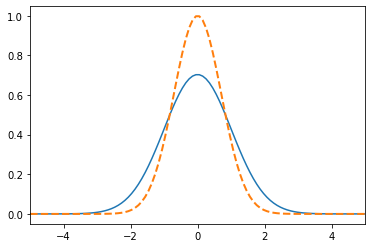

In [9]:
def upwind_scheme(nu, u, N):

    un = np.zeros_like(u)

    for i in range(N):
        un[0] = u[0] - nu*(u[0] - u[-1])
        for j in range(1,u.shape[0]):
            un[j] = u[j] - nu*(u[j] - u[j-1])

        u[:] = un[:]

        #print(i, nu, np.max(u))
        
u = np.zeros_like(x)
initialize_data(u, x)
upwind_scheme(nu, u, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, ue, lw=2, ls='--')
ax.set_xlim([-L/2, L/2])

#### Modified Equation

Remember the MEA analysis from this.  The numerical diffusion term:

$$ \mu = \frac{1}{2} a \Delta x \left ( 1 - \nu \right ) $$

We can change the CFL number to see what happens

(-5.0, 5.0)

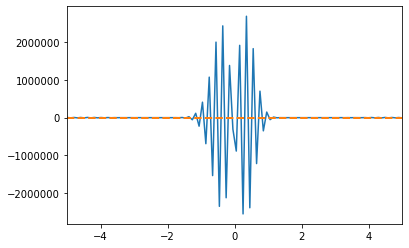

In [10]:
#set delta t
nu = 1.5

#size of time domain (1 periodic pass)
N = int (L / (nu*dx))
u = np.zeros_like(x)
initialize_data(u, x)
upwind_scheme(nu, u, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, ue, lw=2, ls='--')
ax.set_xlim([-L/2, L/2])

### Implict Scheme

$\mathrm{T.E.} = \mathcal{O}(\Delta t, \Delta x^2)$

This uses implicit time integration with a central difference.  We use the central difference because we are using the new time step which allows the scheme to remain stable.

$$u_i^{n+1} = u_i^n + \frac{\nu}{2} \left ( u^{n+1}_{i+1} - u^{n+1}_{i-1} \right )$$

In order to solve:

$$a_j u_{i+1}^{n+1} + b_j u_i^{n+1} + c_j u_{i-1}^{j+1} = d_j$$


where $a_j = \nu/2$, $b_j = 1$, $c_j = -\nu/2$, and $d_j = u^n_i$.  You should use an efficient Thomas Algorithm to solve, but below I show the brute force matrix inversion method (Not efficient!)

The modified equation $u_t + u_x = \mu u_{xx} + \eta u_{xxx}$

Numerical Viscosity will always be present because $\Delta t > 0$, but the T.E. increases proportional to $\Delta t$:
$$\mu = \frac{1}{2}a^2\Delta t$$

Numerical dispersion (Present in high wavenumbers, i.e. causes small oscillations.): 
$$\eta = - \left ( \frac{1}{6} a \Delta x^2 + \frac{1}{3} a^3 \Delta t^2 \right )$$

0 0.5 0.9975265184719545
1 0.5 0.9927063978426207
2 0.5 0.9926269882769279
3 0.5 0.9880156364365408
4 0.5 0.9877899260867764
5 0.5 0.9833795896464121
6 0.5 0.9830143998702401
7 0.5 0.9787976276787095
8 0.5 0.9782994778476687
9 0.5 0.9742691093785738
10 0.5 0.9736442299855699
11 0.5 0.9697933840868053
12 0.5 0.9690477293570141
13 0.5 0.9653697933619357
14 0.5 0.964509053376234
15 0.5 0.960997672574383
16 0.5 0.9600272849154284
17 0.5 0.9566763523795054
18 0.5 0.955601513311484
19 0.5 0.9524051600762369
20 0.5 0.9512308352699916
21 0.5 0.9481834208577788
22 0.5 0.9469143556735959
23 0.5 0.9440104589606094
24 0.5 0.9426511883013939
25 0.5 0.9398855987178746
26 0.5 0.9384404564657578
27 0.5 0.9358081655229766
28 0.5 0.9342812935726239
29 0.5 0.9317774867089534
30 0.5 0.9301728436109782
31 0.5 0.9277928923490176
32 0.5 0.9261142615768474
33 0.5 0.92385371598319
34 0.5 0.9221047138376649
35 0.5 0.9199592952773308
36 0.5 0.9181433784360709
37 0.5 0.9161089726091106
38 0.5 0.9142294453756611
3

(-5.0, 5.0)

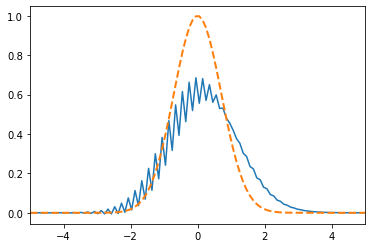

In [9]:
def implicit_scheme(nu, u, N):

    sz = u.shape[0]
    A = np.zeros((sz,sz))
    for i in range(0, u.shape[0]):
        A[i,i] = 1

    for i in range(1, u.shape[0]):
        A[i,i-1] = -nu/2
        A[i-1,i] = nu/2

    A[0,-1] = -1.0
    A[-1,0] = -1.0

    for i in range(N):
        dd = np.ones_like(u)*u
        dd[0] = 0.0
        dd[-1] = 0.0

        un = np.linalg.solve(A, dd)

        u[:] = un[:]

        print(i, nu, np.max(u))
        
#set delta t
nu = .5 #.01
#size of time domain (1 periodic pass)
N = int (L / (nu*dx))
u = np.zeros_like(x)
initialize_data(u, x)
implicit_scheme(nu, u, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, ue, lw=2, ls='--')
ax.set_xlim([-L/2, L/2])
        
        

### Leapfrog Scheme

Here is our first attempt at a second order in time.   In many cases, we don't use first order accurate schemes because of there inherent inaccuracies.  Here, we use a method with three time levels $(n+1, n, n-1)$.

$\mathrm{T.E.} = \mathcal{O}(\Delta t^2, \Delta x^2)$

$$u_i^{n+1} = u_i^{n-1} + \nu \left ( u^n_{i+1} - u^n_{i-1} \right )$$

The modified equation is purely dispersive

Numerical Viscosity:
$$\mu = 0$$

Numerical Dispersion:
$$\eta = \frac{a \Delta x^2}{6} \left (\nu^2 -1 \right)$$

Because there is no diffusive errors, the scheme is neutrally stable.  This means that errors will not be damped, but don't grow due to T.E. either.   The stability is $\nu \le 1$. 

**A major disadvantage is that the differencing does not depend on the $u^n$ level, so two independent solutions develop.**


(-5.0, 5.0)

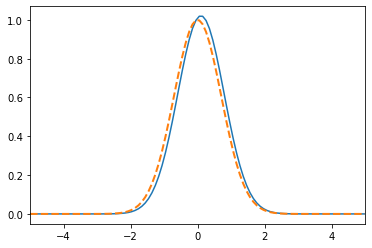

In [12]:
def leapfrog_scheme(nu, u, N):

    un = np.zeros_like(u)
    um = np.ones_like(u)*u

    for i in range(N):

        un[0] = um[0] - nu*(u[1] - u[-1])
        for j in range(1, u.shape[0]-1):

            un[j] = um[j] - nu*(u[j+1] - u[j-1])

        un[-1] = um[-1] - nu*(u[0] - u[-2])

        um[:] = u[:]
        u[:] = un[:]

        #print(i, nu, np.max(u))
        
#set delta t
nu = 1.01 #.01
#size of time domain (1 periodic pass)
N = int (L / (nu*dx))
u = np.zeros_like(x)
initialize_data(u, x)
leapfrog_scheme(nu, u, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, ue, lw=2, ls='--')
ax.set_xlim([-L/2, L/2])

## Lax-Wendroff Scheme

This is another second order accurate scheme with $\mathrm{T.E.} = \mathcal{O}(\Delta t^2, \Delta x^2)$.

We start with the Taylor series expansion on $u$ around $t$.  

$$u_i^{n+1} = u_i + \Delta t u_t + \frac{\Delta t^2}{2}u_{tt} + \frac{\Delta t^3}{6}u_{ttt} + \mathcal{O}(\Delta t^4)$$

Now we can use the definition linear convection to substitute for $u_t$. **We want to get time derivative into spatial derivative**:
$$u_t = -a u_x$$

Now we need to find a relation for the $u_{tt}$ term.  We can look at this in two ways.
1. Linear convection is nothing more that a first order wave equation. So let's use: $u_{tt} = a^2 u_{xx}$.
2. We can take the time derivative of $u_t = -a u_x$:
\begin{align}
    u_{tt} &= -a \frac{\partial }{\partial t} u_x \\
    u_{tt} &= -a u_{tx} \\
    u_{tt} &= -a u_{xt} \\
    u_{tt} &= -a \frac{\partial}{\partial x} u_t \\
    u_{tt} &= -a \frac{\partial}{\partial x} \left ( -a u_x \right )\\
    u_{tt} &= a^2 u_{xx}
\end{align}

Either way in the end we get:

$$u^{n+1} = u^n - \Delta t a u_x + \frac{a^2 \Delta t^2}{2} u_{xx} + \mathcal{O}(\Delta x^3)$$

We can discretize this with central differences for $u_x$ and $u_{xx}$

$$u^{n+1}_i = u^{n}_i - \frac{\nu}{2} \left ( u_{i+1}^n - u^n_{i-1} \right ) + \frac{\nu^2}{2} \left (u_{i+1}^n -2u^n_i + u^n_{i-1} \right )$$

The ME for this is both diffusive and dispersive:

Numerical Viscosity:
$$\mu = -a\frac{\Delta x^3}{8} \nu\left(1 - \nu^2 \right ) u_{xxxx}$$

Numerical Dispersion:
$$\eta = -a\frac{\Delta x^2}{6} \left (1-\nu^2\right) u_{xxx}$$

Stability: $\nu \le 1$


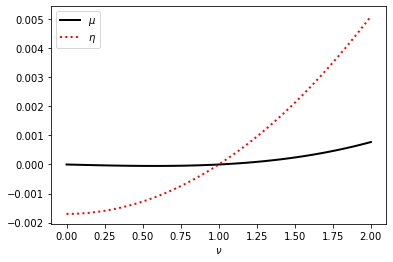

In [13]:
nut = np.linspace(0,2)
dx = x[1]-x[0]
mu = -c*dx**3/8*nut*(1-nut**2)
eta = -c*dx**2/6*(1-nut**2)

plt.plot(nut, mu, 'k', lw=2, label='$\mu$')
plt.plot(nut, eta, 'r:', lw=2, label='$\eta$')
plt.xlabel(r'$\nu$')
plt.legend()

0 1 0.9974524902978223
1 1 0.9974524902978225
2 1 0.9974524902978226
3 1 0.9974524902978226
4 1 0.9974524902978226
5 1 0.9974524902978226
6 1 0.9974524902978226
7 1 0.9974524902978226
8 1 0.9974524902978226
9 1 0.9974524902978226
10 1 0.9974524902978226
11 1 0.9974524902978226
12 1 0.9974524902978226
13 1 0.9974524902978226
14 1 0.9974524902978226
15 1 0.9974524902978226
16 1 0.9974524902978226
17 1 0.9974524902978226
18 1 0.9974524902978226
19 1 0.9974524902978226
20 1 0.9974524902978226
21 1 0.9974524902978226
22 1 0.9974524902978226
23 1 0.9974524902978226
24 1 0.9974524902978226
25 1 0.9974524902978226
26 1 0.9974524902978226
27 1 0.9974524902978226
28 1 0.9974524902978226
29 1 0.9974524902978226
30 1 0.9974524902978226
31 1 0.9974524902978226
32 1 0.9974524902978226
33 1 0.9974524902978226
34 1 0.9974524902978226
35 1 0.9974524902978226
36 1 0.9974524902978226
37 1 0.9974524902978226
38 1 0.9974524902978226
39 1 0.9974524902978226
40 1 0.9974524902978226
41 1 0.9974524902978226
42

(-5.0, 5.0)

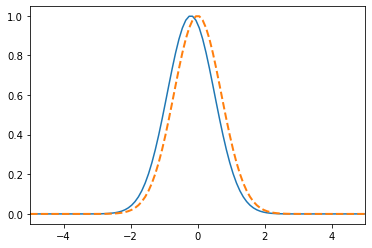

In [15]:
def lax_wendroff_scheme(nu, u, N):

    un = np.zeros_like(u)

    for i in range(N):

        un[0] = u[0] - nu/2.0 * ( u[1] - u[-1] ) + \
                 nu**2/2.0 * ( u[1] - 2*u[0] + u[-1] )

        for j in range(1, u.shape[0]-1):

            un[j] = u[j] - nu/2.0 * ( u[j+1] - u[j-1] ) + \
                    nu**2/2.0 * ( u[j+1] - 2*u[j] + u[j-1] )

        un[-1] = u[-1] - nu/2.0 * ( u[0] - u[-2] ) + \
                 nu**2/2.0 * ( u[0] - 2*u[-1] + u[-2] )

        u[:] = un[:]

        print(i, nu, np.max(u))


#set delta t
nu = 1 #.01
#size of time domain (1 periodic pass)
N = int (L / (nu*dx))
u = np.zeros_like(x)
initialize_data(u, x)
lax_wendroff_scheme(nu, u, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, ue, lw=2, ls='--')
ax.set_xlim([-L/2, L/2])

### MacCormack Method

This is another second order accurate scheme.  It is an example of a predictor-corrector two-step scheme.  It is identical the Lax-Wendroff

\begin{align}
   u^c_i &= u_i^n + \nu \left (u^n_{i+1} - u_j^n \right ) \\
   u^{n+1}_i &= \frac{1}{2} \left (u^n_i + u^c_i  - \nu \left (u^c_{i} - u^c_{i-1}\right) \right )
\end{align}



Max u:  0.9999709688076139
Max u:  0.9974714386522537
Max u:  0.9999114949244327
Max u:  0.9974884368790804
Max u:  0.999850144705275
Max u:  0.997503488960916
Max u:  0.9997869250522435
Max u:  0.9975165990291635
Max u:  0.999721842988337
Max u:  0.9975277713618923
Max u:  0.9996549056548534
Max u:  0.997537010381686
Max u:  0.9995861203087855
Max u:  0.9975443206534611
Max u:  0.9995154943202057
Max u:  0.9975497068822594
Max u:  0.9994430351696475
Max u:  0.9975531739110145
Max u:  0.9993687504454811
Max u:  0.9975547267182956
Max u:  0.9992926478412869
Max u:  0.9975543704160315
Max u:  0.9992147351532306
Max u:  0.9975521102472145
Max u:  0.999135020277437
Max u:  0.9975479515835877
Max u:  0.9990535112073667
Max u:  0.9975418999233161
Max u:  0.9989702160312006
Max u:  0.9975339608886462
Max u:  0.9988851429292264
Max u:  0.9975241402235513
Max u:  0.9987983001712347
Max u:  0.9975124437913689
Max u:  0.9987096961139248
Max u:  0.9974988775724287
Max u:  0.9986193391983196
Max u:

(-5.0, 5.0)

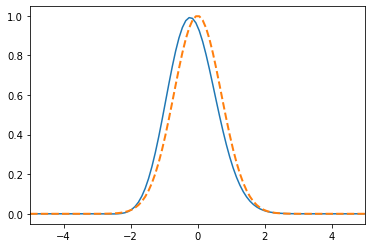

In [16]:
def maccormack_scheme(nu, u, N):

    un = np.zeros_like(u)
    up = np.zeros_like(u)

    for i in range(N):
        up[0] = u[0] - nu*(u[1] - u[0])

        for j in range(1, u.shape[0]-1):

            up[j] = u[j] - nu*(u[j+1] - u[j])
            un[j] = 0.5*( u[j] + up[j] - nu*(up[j] - up[j-1]) )

        up[-1] = u[-1] - nu*(u[0] - u[-1])
        un[-1] = 0.5*( u[-1] + up[-1] - nu*(up[-1] - up[-2]) )

        un[0] = 0.5*( u[0] + up[0] - nu*(up[0] - up[-1]) )

        u[:] = un[:]

        print('Max u: ', np.max(u))

#set delta t
nu = .5 #.01
#size of time domain (1 periodic pass)
N = int (L / (nu*dx))
u = np.zeros_like(x)
initialize_data(u, x)
maccormack_scheme(nu, u, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, ue, lw=2, ls='--')
ax.set_xlim([-L/2, L/2])

### Time-Centered Implicit Method 

### Time-Centered Implicit Method  

  

Now we want to try a second order accurate implicit scheme.  Let's start with the Taylor series that we subtract the latter from the former: 

  

$$u^{n+1}_i = u^n_i + \Delta t u^n_t + \frac{\Delta t^2}{2} u^n_{tt} + \frac{\Delta t^3}{6} u^n_{ttt} + ...$$ 

$$u^n_i = u^{n+1}_i - \Delta t u^{n+1}_t + \frac{\Delta t^2}{2} u^{n+1}_{tt} - \frac{\Delta t^3}{6} u^{n+1}_{ttt}+ ...$$ 

  

Then we replace $u^{n+1}_{tt}$: 

$$u^{n+1}_{tt} = u^n_{tt} + \Delta t u^n_{ttt}$$ 

  

  

We can get the expression: 

  

$$u_i^{n+1} = u_i^n + \frac{\Delta t}{2} \left ( u^n_t + u_t^{n+1} \right ) + \mathcal{O}(\Delta t^3)$$ 

  

This is Crank-Nicolson differencing...where we split the time difference over the current and the next time level.  We can substitute $u_t = -au_x$ into the equation. 

  

$$u_i^{n+1} = u_i^n - \frac{\Delta t}{2} \left (a u^n_x + u_x^{n+1} \right ) + \mathcal{O}(\Delta t^3)$$ 

  

Then use a second order central difference 


$$u_i^{n+1} = u_i^n - \frac{\nu}{4} \left ( u^n_{i+1} + u^{n+1}_{i+1} - u^n_{i-1} - u^{n-1}_{i-1}\right ) + \mathcal{O}(\Delta t^3, \Delta x^3)$$ 

The modified equation contains no numerical viscosity!! 

Numerical Dispersion: 

$$\eta = - \left ( \frac{a^3 \Delta t^2}{12} + \frac{a \Delta x^2}{6} u_{xx} \right )$$ 

We can set this up for the Thomas Algorithm 

\begin{align} 
a &= -\nu/4 \\ 
b &= 1 \\ 
c &= \nu/4 \\ 
d &= u^n_i - \nu/4 u_{i+1} + \nu/4 u_{i-1} 
\end{align} 

Max u:  0.997600546646087
Max u:  0.9977412698187983
Max u:  0.9978746410494564
Max u:  0.9980006438276967
Max u:  0.9981192639116626
Max u:  0.9982304893373367
Max u:  0.9983343104248216
Max u:  0.9984307197815696
Max u:  0.998519712302551
Max u:  0.998601285167395
Max u:  0.9986754378345163
Max u:  0.9987421720322567
Max u:  0.9988014917471094
Max u:  0.9988534032090514
Max u:  0.9988979148740659
Max u:  0.9989350374039191
Max u:  0.9989647836432651
Max u:  0.9989871685941861
Max u:  0.9990022093881485
Max u:  0.9990099252563089
Max u:  0.999010337492175
Max u:  0.9990034694475339
Max u:  0.998989346311367
Max u:  0.998967996090487
Max u:  0.9989394443315263
Max u:  0.9989037391670249
Max u:  0.9988608388363128
Max u:  0.9988110841828811
Max u:  0.9987533330843456
Max u:  0.9986918861366065
Max u:  0.9986122885871559
Max u:  0.9985609462211689
Max u:  0.9983983379645035
Max u:  0.9985199469864299
Max u:  0.9978710419841657
Max u:  0.9991002823859008
Max u:  0.9959474485309056
Max u: 

(-5.0, 5.0)

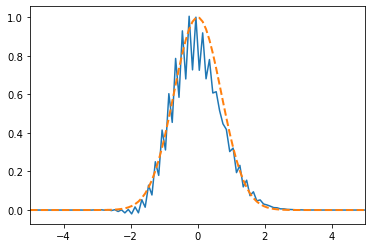

In [17]:
def implicit_trap_scheme(nu,u, N):


    sz = u.shape[0]
    A = np.zeros((sz,sz))
    for i in range(0, u.shape[0]):
        A[i,i] = 1.0

    for i in range(1, u.shape[0]):
        A[i,i-1] = -nu/4
        A[i-1,i] = nu/4

    A[0,-1] = -1.0
    A[-1,0] = -1.0

    for i in range(N):
        dd = np.ones_like(u)*u
        dd[1:-1] += -nu/4*u[2:] + nu/4*u[:-2]
        dd[0] = 0.0
        dd[-1] = 0.0

        un = np.linalg.solve(A, dd)

        u[:] = un[:]

        print('Max u: ', np.max(u))

#set delta t
nu = 1 #.01
#size of time domain (1 periodic pass)
N = int (L / (nu*dx))
u = np.zeros_like(x)
initialize_data(u, x)
implicit_trap_scheme(nu, u, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, ue, lw=2, ls='--')
ax.set_xlim([-L/2, L/2])